In [2]:
!pip install numpy-stl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import files
files.upload()

Saving graphics.stl to graphics.stl


{'graphics.stl': b'Exported from Blender-3.5.1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8\x03\x00\x00?\xdd+?\xc2\xe66\xbf~\xd2I\xbe\x00\x00\xf0>\x00\x00B\xbf\x00\x00x>\x00\x00\xe0>\x00\x00D\xbf\x00\x00(>\x00\x00\x00?\x00\x000\xbf\x00\x00\xc0=\x00\x00\xa6e)?\xfb\xcb8\xbf\xbb}O\xbe\x00\x00\xf0>\x00\x00B\xbf\x00\x00x>\x00\x00\x00?\x00\x000\xbf\x00\x00\xc0=\x00\x00\x10?\x00\x00,\xbf\x00\x00x>\x00\x00?\xdd+\xbf\xc2\xe66\xbf~\xd2I\xbe\x00\x00\x00\xbf\x00\x000\xbf\x00\x00\xc0=\x00\x00\xe0\xbe\x00\x00D\xbf\x00\x00(>\x00\x00\xf0\xbe\x00\x00B\xbf\x00\x00x>\x00\x00\xa6e)\xbf\xfb\xcb8\xbf\xbb}O\xbe\x00\x00\x00\xbf\x00\x000\xbf\x00\x00\xc0=\x00\x00\xf0\xbe\x00\x00B\xbf\x00\x00x>\x00\x00\x10\xbf\x00\x00,\xbf\x00\x00x>\x00\x00\xf8#U?:\xda\xed\xbe\x1cs\x9a\xbe\x00\x00\x10?\x00\x00,\xbf\x00\x00x>\x00\x00\x00?\x00\x000\xbf\x00\x00\xc

In [4]:
!ls

sample_data


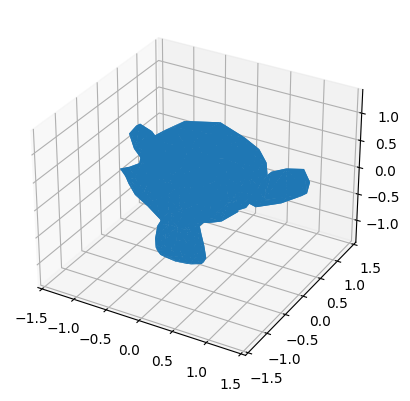

In [ ]:
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

# Create a new plot
figure = plt.figure()
# axes = mplot3d.Axes3D(figure)
ax = plt.axes(projection="3d")

# Load the STL files and add the vectors to the plot
# your_mesh = mesh.Mesh.from_file('3D_model_of_a_Cube.stl')
your_mesh = mesh.Mesh.from_file('graphics.stl')

ax.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten('A')
ax.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()

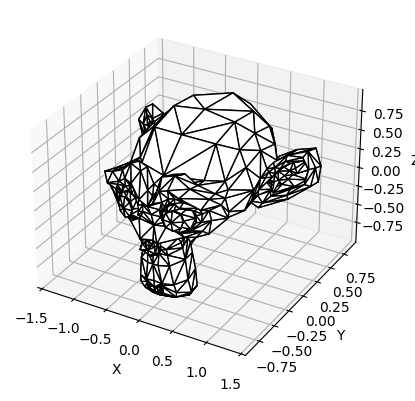

In [ ]:
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Load the STL file
your_mesh = mesh.Mesh.from_file('graphics.stl')

# Create a new plot
figure = plt.figure()
ax = plt.axes(projection="3d")

# Add the vectors from the STL file to the plot
mesh_collection = mplot3d.art3d.Poly3DCollection(your_mesh.vectors)
mesh_collection.set_edgecolor('k')  # Set edge color for outline
mesh_collection.set_facecolor('w')  # Set face color for the interior
ax.add_collection3d(mesh_collection)

# Set plot parameters
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Auto scale to fit the mesh
ax.auto_scale_xyz(your_mesh.x.flatten(), your_mesh.y.flatten(), your_mesh.z.flatten())

# Show the plot
plt.show()

Vertices: 
 [[ 0.46875   -0.7578125  0.2421875]
 [ 0.4375    -0.765625   0.1640625]
 [ 0.5       -0.6875     0.09375  ]
 ...
 [-0.7890625  0.328125  -0.125    ]
 [-0.59375    0.1640625 -0.125    ]
 [-0.7734375  0.125     -0.140625 ]]
Faces: 
 [[   0    1    2]
 [   3    4    5]
 [   6    7    8]
 ...
 [2895 2896 2897]
 [2898 2899 2900]
 [2901 2902 2903]]


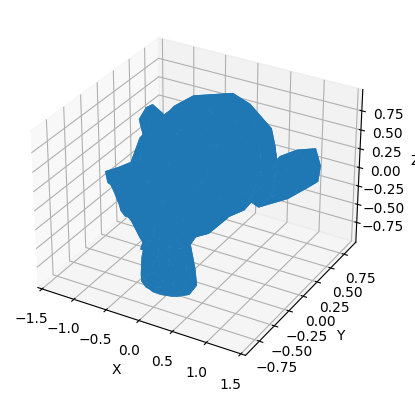

In [7]:
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.tri as mtri
import plotly.graph_objects as go

# Load the STL file
your_mesh = mesh.Mesh.from_file('graphics.stl')

# Create a new plot
figure = plt.figure()
ax = plt.axes(projection="3d")

# Add the vectors from the STL file to the plot
ax.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Set plot parameters
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Auto scale to fit the mesh
ax.auto_scale_xyz(your_mesh.x.flatten(), your_mesh.y.flatten(), your_mesh.z.flatten())

# Get the vertices and faces of the mesh
vertices = your_mesh.vectors.reshape(-1, 3)
print("Vertices: \n", vertices)
faces = np.arange(vertices.shape[0]).reshape(-1, 3)
print("Faces: \n", faces)

# Create a triangulation object
triang = mtri.Triangulation(vertices[:, 0], vertices[:, 1], faces)

# Extract the z coordinates
z = vertices[:, 2]

# Create a Plotly trace from the triangulation
trace = go.Mesh3d(
    x=triang.x,
    y=triang.y,
    z=z,
    i=triang.triangles[:, 0],
    j=triang.triangles[:, 1],
    k=triang.triangles[:, 2],
    color= 'limegreen', #'darkgrey',   #'lightgrey',
    flatshading=True
)

# Create the Plotly figure
fig = go.Figure(data=[trace])

# Show the interactive plot
fig.show()